In [1]:
import pandas as pd
import seaborn as sns
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import folium
import plotly.express as px

# Reading My Data

In [2]:
df = pd.read_csv('census_08_2022.csv') #Reading my dataset

In [3]:
df

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian
1,1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian
2,2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian
3,3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian
4,4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...
8655,8655,1,December Manor,Kevin,Brown,22,None,Single,Male,University Student,None,None
8656,8656,1,December Manor,Ashleigh,Porter,43,None,Single,Female,Barista,None,None
8657,8657,1,December Manor,Marilyn,Smith,42,None,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Christian
8658,8658,1,December Manor,Joanna,Steele,46,None,Single,Female,Theme park manager,None,Catholic


In [4]:
df.info() #Inspecting my data
#Unnamed
#Null values noticed in Marital Status and Religion, Age data type showing as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8660 non-null   int64 
 1   House Number                   8660 non-null   int64 
 2   Street                         8660 non-null   object
 3   First Name                     8660 non-null   object
 4   Surname                        8660 non-null   object
 5   Age                            8660 non-null   object
 6   Relationship to Head of House  8660 non-null   object
 7   Marital Status                 6780 non-null   object
 8   Gender                         8660 non-null   object
 9   Occupation                     8660 non-null   object
 10  Infirmity                      8660 non-null   object
 11  Religion                       6720 non-null   object
dtypes: int64(2), object(10)
memory usage: 812.0+ KB


In [5]:
#Dropping unnamed:0 column
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df.isnull().sum() 

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1880
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1940
dtype: int64

In [7]:
#number of times a value occurs in a particular list.
df.count()

House Number                     8660
Street                           8660
First Name                       8660
Surname                          8660
Age                              8660
Relationship to Head of House    8660
Marital Status                   6780
Gender                           8660
Occupation                       8660
Infirmity                        8660
Religion                         6720
dtype: int64

# Checking for Unique Values

In [8]:
df['Marital Status'].unique()
#Abbreviations and empty cells

array(['Married', 'Single', nan, 'Widowed', 'Divorced', 'W', 'D', 'S',
       ' ', 'M'], dtype=object)

In [9]:
df['Marital Status'].value_counts()

Single      3067
Married     2349
Divorced     872
Widowed      471
D              8
S              7
W              4
               1
M              1
Name: Marital Status, dtype: int64

In [10]:
df['Religion'].unique()
#nan noticed in Religion. They will be classified as 'None' if they are minors(<18).

array(['Christian', 'None', nan, 'Catholic', 'Muslim', 'Methodist',
       'Sikh', 'Jewish', 'Buddist', 'Private', 'Jedi', 'Orthodoxy',
       'Baptist'], dtype=object)

In [11]:
df['Religion'].value_counts()

None         2937
Christian    1976
Catholic      999
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Jedi            1
Baptist         1
Name: Religion, dtype: int64

In [12]:
df['Age'].unique()
#Strings and floats noticed in Age

array(['64', '63', '57', '30', '28', '26', '66', '69', '18', '17', '55',
       '54', '22', '8', '20', '21', '19', '25', '23', '45', '37', '49',
       '16', '27', '10', '70', '77', '43', '41', '35', '48', '36', '51',
       '40', '9', '78', '79', '72', '7', '5', '46', '6', '3', '2', '83',
       '0', '24', '1', '34', '56', '58', '59', '13', '32', '44', '29',
       '50', '84', '81', '31', '72.96085149', '70.96085149', '15', '65',
       '73', '39', '14', '33', '4', '52', '68', '42', '38', '62', '74',
       '80', '53', '61', '11', '71', '47', '12', '75', '60', '67', '82',
       '51.06349086', '58.06349086', '86', '88', '89', '93', '76',
       '90.52266282', '94.52266282', '87', '85', '104', '111', '101',
       '92', '102', '99', '119', '125', '96', '94', '95', '90',
       '76.07454892', 'three', '97', '91', '105', '98', '54.02795928',
       '58.02795928'], dtype=object)

In [13]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [14]:
df['Street'].unique()

array(['Dixon Drive', 'Lee Isle', 'Berry Hollow', 'Roberts Street',
       'Lees Drive', 'Whitehead Squares', 'Dumnonia Drive',
       'King Station', 'Tannery Valleys', 'London Street',
       'Quayside Unions', 'Minster Pike', 'Roman Lock', 'Severn Park',
       'Templekit Street', 'Miah Oval', 'Silverport Lane',
       'Griffin Skyway', 'Williampound Drive', 'Palmtree Glen',
       'Panther Manors', 'East Crescent', 'Cook Underpass',
       'Bulldog Avenue', 'Francis Course', 'Sydney Avenue', 'Manor Ridge',
       'Calendar Curve', 'Owen Route', 'Magician Shoal',
       'Cunningham Keys', 'Swansea Road', 'Clarke Lane', 'Outer Road',
       'Jordan Road', 'Roberts Drive', 'Wilson Key', 'Pendragon Villages',
       'Unity Streets', 'Nicholson Port', 'Crown Lane', 'Evans Avenue',
       'September Drive', 'Pollard Road', 'Willowdike Road',
       'Reynolds Lane', 'Archtap Drive', 'Lisburn Lane', 'Turner Drive',
       'Sandy Tunnel', 'Fish Drive', 'Causewaynail Avenue', 'Patel Vista',


In [15]:
df['First Name'].unique()
#Empty/missing cell noticed in First name. If it's just a row and that's the only cell missing, we may decide to drop it or preferably give the occupant a 'Jane(John)-Doe' first name depending on the gender, as this(the first name) will not in way have any effect on the output of analysis itself.

array(['Leon', 'Lauren', 'Katie', 'Jordan', 'Gareth', 'Abigail',
       'Marilyn', 'William', 'Francesca', 'Ruth', 'Georgina', 'Chloe',
       'Adrian', 'Alison', 'Jay', 'Leslie', 'Sheila', 'Kevin', 'Jane',
       'Joshua', 'Julia', 'John', 'Alexandra', 'Craig', 'Katherine',
       'Kieran', 'Kelly', 'Mary', 'Sarah', 'Elaine', 'Paul', 'Katy',
       'Cameron', 'Elizabeth', 'Clifford', 'Geoffrey', 'Lucy', 'Jeffrey',
       'Rebecca', 'Rosie', 'Ronald', 'Ross', 'Callum', 'Ellie', 'Trevor',
       'Heather', 'Lynne', 'Barry', 'Danielle', 'Amanda', 'Stacey',
       'Terence', 'Mohammad', 'Tom', 'Vincent', 'Aimee', 'Alice', 'Karen',
       'Michelle', 'Charlotte', 'Vanessa', 'Maureen', 'Megan', 'Lindsey',
       'Patrick', 'James', 'Fiona', 'Margaret', 'Donald', 'Rosemary',
       'Lisa', 'Sylvia', 'George', 'Lee', 'Cheryl', 'Geraldine',
       'Harriet', 'Simon', 'Joanna', 'Jacqueline', 'Diane', 'Brian',
       'Stanley', 'Mitchell', 'Toby', 'Eleanor', 'Leanne', 'Dylan',
       'Linda', 'B

In [16]:
df['Surname'].unique()

array(['Clark', 'Turnbull', 'Kirby', 'Warner', 'Thomas', 'Harris',
       'Allen', 'Booth', 'Burrows', 'Young', 'Morris', 'Read', 'Ashton',
       'Roberts', 'Abbott', "O'Neill", 'Gray', 'Ryan', 'Grant', 'Burton',
       'Edwards', 'Moore', 'Matthews', 'Singh', 'Mason', 'Joyce', 'Reed',
       'Bailey', 'Smith', 'Atkinson', 'Perkins', 'Gilbert', 'Thornton',
       'Martin', 'Bell', 'Lee', 'Jennings', 'Fletcher', 'Taylor',
       'Pearce-Taylor', 'Robinson', 'Field', 'Archer', 'Long', 'Davies',
       'Wood', 'Parker', 'Parkes', 'Gill', 'Barnes-Reynolds', 'Perry',
       'Hammond', 'Griffiths', 'Coates', 'McDonald', 'Hunter',
       'Dawson-Hunter', 'Dixon', 'Freeman', 'Jones', 'Chapman',
       'Lawrence', 'Mann', 'Adams', 'Griffiths-Matthews', 'Newman',
       'Wilkinson', 'West', 'Lamb', 'Jarvis', 'Jordan', 'Hussain',
       'Tomlinson', 'Fuller', 'Bradshaw', 'Bartlett', 'Foster',
       'Reynolds', 'Ball', 'Carter', 'Walsh', 'Skinner', 'Johnson',
       'Cross', 'McKenzie', 'Schofie

In [17]:
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Son', 'Daughter', 'Husband', 'Granddaughter',
       'None', 'Lodger', 'Partner', 'Sibling', 'Visitor', 'Grandson',
       'Step-Son', 'Adopted Son', 'Nephew', 'Cousin', 'Adopted Daughter',
       'Son-in-law', 'Adopted Granddaughter', 'Neice', 'Daughter-in-law',
       'Step-Daughter', 'Adopted Grandson'], dtype=object)

In [18]:
df['Occupation'].unique()
#Empty cell noticed in Occupation. 

array(['Engineer, energy', 'Psychiatrist', 'Unemployed', ...,
       'Retired Textile designer', 'Retired Mudlogger',
       'Retired Designer, multimedia'], dtype=object)

In [19]:
df['Occupation'].value_counts()

Student                              1566
Unemployed                            597
University Student                    525
Child                                 425
PhD Student                            23
                                     ... 
Retired Insurance account manager       1
Retired Public relations officer        1
Retired Media planner                   1
Retired Geochemist                      1
Retired Designer, multimedia            1
Name: Occupation, Length: 1129, dtype: int64

In [20]:
df['Infirmity'].unique()
#Infirmity has empty cells

array(['None', 'Physical Disability', ' ', 'Mental Disability', 'Blind',
       'Deaf', 'Disabled', 'Unknown Infection'], dtype=object)

# DATA CLEANING


In [21]:
df.drop_duplicates(inplace=True) #Dropping duplicates

# AGE

In [22]:
df['Age'].replace(['three'], 3, inplace = True)
df['Age'] = df['Age'].astype('float')
df['Age'] = df['Age'].astype('int64')
df['Age'].unique()
#Converting strings, object and floating values in Age to intergers.

array([ 64,  63,  57,  30,  28,  26,  66,  69,  18,  17,  55,  54,  22,
         8,  20,  21,  19,  25,  23,  45,  37,  49,  16,  27,  10,  70,
        77,  43,  41,  35,  48,  36,  51,  40,   9,  78,  79,  72,   7,
         5,  46,   6,   3,   2,  83,   0,  24,   1,  34,  56,  58,  59,
        13,  32,  44,  29,  50,  84,  81,  31,  15,  65,  73,  39,  14,
        33,   4,  52,  68,  42,  38,  62,  74,  80,  53,  61,  11,  71,
        47,  12,  75,  60,  67,  82,  86,  88,  89,  93,  76,  90,  94,
        87,  85, 104, 111, 101,  92, 102,  99, 119, 125,  96,  95,  97,
        91, 105,  98], dtype=int64)

In [23]:
df['Age'].describe()

count    8660.000000
mean       37.557968
std        22.008644
min         0.000000
25%        20.000000
50%        37.000000
75%        53.000000
max       125.000000
Name: Age, dtype: float64

In [24]:
age_range=[]
for Age in df['Age']:
    if Age <=4:
        age_range.append('0-4')
    elif Age >=5 and Age <10:
        age_range.append('5-9')
    elif Age >=10 and Age <15:
        age_range.append('10-14')
    elif Age >=15 and Age <20:
        age_range.append('15-19')
    elif Age >=20 and Age <25:
        age_range.append('20-24')
    elif Age >=25 and Age <30:
        age_range.append('25-29')
    elif Age >=30 and Age <35:
        age_range.append('30-34')
    elif Age >=35 and Age <40:
        age_range.append('35-39')
    elif Age >=40 and Age <45:
        age_range.append('40-44')
    elif Age >=45 and Age <50:
        age_range.append('45-49')
    elif Age >=50 and Age <55:
        age_range.append('50-54')
    elif Age >=55 and Age <60:
        age_range.append('55-59')
    elif Age >=60 and Age <65:
        age_range.append('60-64')
    elif Age >=65 and Age <70:
        age_range.append('65-69')
    elif Age >=70 and Age <75:
        age_range.append('70-74')
    elif Age >=75 and Age <80:
        age_range.append('75-79')
    elif Age >=80 and Age <85:
        age_range.append('80-84')
    elif Age >=85 and Age <90:
        age_range.append('85-89')
    elif Age >=90 and Age <95:
        age_range.append('90-94')
    elif Age >=95 and Age <100:
        age_range.append('95-99')
    elif Age >=100 and Age <105:
        age_range.append('100-104')
    elif Age >=105 and Age <110:
        age_range.append('105-109')
    else:
        age_range.append('110+')
df['age_range'] = age_range
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian,60-64
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian,60-64
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,55-59
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian,30-34
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...
8655,1,December Manor,Kevin,Brown,22,None,Single,Male,University Student,None,None,20-24
8656,1,December Manor,Ashleigh,Porter,43,None,Single,Female,Barista,None,None,40-44
8657,1,December Manor,Marilyn,Smith,42,None,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Christian,40-44
8658,1,December Manor,Joanna,Steele,46,None,Single,Female,Theme park manager,None,Catholic,45-49


In [25]:
Male_Age_group = df['age_range'][df.Gender == 'Male'].value_counts().sort_index()
Female_Age_group = df['age_range'][df.Gender == 'Female'].value_counts().sort_index()

In [26]:
Male_Age_group

0-4        198
10-14      293
100-104      5
110+         2
15-19      288
20-24      301
25-29      256
30-34      298
35-39      306
40-44      321
45-49      273
5-9        278
50-54      233
55-59      243
60-64      193
65-69      140
70-74      149
75-79      109
80-84       66
85-89       34
90-94       12
95-99        3
Name: age_range, dtype: int64

In [27]:
Female_Age_group

0-4        210
10-14      275
100-104      2
105-109      1
110+         1
15-19      310
20-24      299
25-29      316
30-34      348
35-39      374
40-44      390
45-49      349
5-9        260
50-54      299
55-59      244
60-64      182
65-69      165
70-74      172
75-79       99
80-84       95
85-89       40
90-94        7
95-99        9
Name: age_range, dtype: int64

In [28]:
ageOutliers = df.loc[df['Age'] >100,]
ageOutliers.sort_values(by='Age', ascending=False) # Age sorted in descending order
#Outliers noticed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
3220,10,Swansea Road,Graeme,Bond,125,Husband,Married,Male,"Retired Psychologist, educational",None,Catholic,110+
3219,10,Swansea Road,Teresa,Bond,119,Head,Married,Female,Retired Fisheries officer,None,Catholic,110+
2044,7,Miah Oval,Jason,Brown,111,Husband,Married,Male,Retired Chemical engineer,None,None,110+
6115,99,Price Avenue,Lydia,White,105,Head,Widowed,Female,Retired Dispensing optician,None,Methodist,105-109
2043,7,Miah Oval,Katy,Brown,104,Head,Married,Female,Retired Sport and exercise psychologist,None,None,100-104
2837,1,Sydney Avenue,Hugh,Curtis,104,Head,Single,Male,"Retired Psychotherapist, dance movement",Blind,Christian,100-104
6945,11,Appletree Camp,Douglas,Ellis,104,Head,Divorced,Male,Retired Mechanical engineer,None,Christian,100-104
3007,34,Calendar Curve,Gordon,Allen,102,Head,Married,Male,Retired Corporate investment banker,None,Christian,100-104
2296,37,Griffin Skyway,Luke,Jones,101,Head,Married,Male,Retired Dealer,None,None,100-104
2297,37,Griffin Skyway,Lydia,Jones,101,Wife,Married,Female,Retired Product manager,None,None,100-104


In [29]:
df.drop(3219, inplace=True)
df.drop(3220, inplace=True)
#The Age for the 'Bond' family who are couples looks inconsistent and this may be due to the couples not knowing their real age.
#dropping both rows.

In [30]:
ageOutliers = df.loc[df['Age'] >100,]
ageOutliers

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
2043,7,Miah Oval,Katy,Brown,104,Head,Married,Female,Retired Sport and exercise psychologist,None,None,100-104
2044,7,Miah Oval,Jason,Brown,111,Husband,Married,Male,Retired Chemical engineer,None,None,110+
2296,37,Griffin Skyway,Luke,Jones,101,Head,Married,Male,Retired Dealer,None,None,100-104
2297,37,Griffin Skyway,Lydia,Jones,101,Wife,Married,Female,Retired Product manager,None,None,100-104
2837,1,Sydney Avenue,Hugh,Curtis,104,Head,Single,Male,"Retired Psychotherapist, dance movement",Blind,Christian,100-104
3007,34,Calendar Curve,Gordon,Allen,102,Head,Married,Male,Retired Corporate investment banker,None,Christian,100-104
4044,31,Pollard Road,Bruce,Roberts,101,Head,Single,Male,"Retired Therapist, speech and language",None,Christian,100-104
6115,99,Price Avenue,Lydia,White,105,Head,Widowed,Female,Retired Dispensing optician,None,Methodist,105-109
6353,59,Daisy Road,Christian,Chambers,101,Head,Married,male,Retired Network engineer,None,Christian,100-104
6945,11,Appletree Camp,Douglas,Ellis,104,Head,Divorced,Male,Retired Mechanical engineer,None,Christian,100-104


# RELIGION

In [31]:
df['Religion'].replace({npy.nan:'None'}, inplace = True)
df['Religion'].replace(['Jedi'], 'None', inplace = True)
#Replacing all nan with 'None' as they are mostly under 18
#Replacing Jedi(a fictional religion and philosophy from the Star Wars universe) with 'None'

In [32]:
religion = df.groupby('Religion')
religion['Age'].agg([npy.mean, npy.median]) #Using grouby to find the mean age of each religion

,mean,median
Religion,,
Baptist,31.000000,31.0
Buddist,36.500000,36.5
Catholic,43.743230,42.0
Christian,51.489879,53.0
Jewish,44.555556,44.0
Methodist,47.353448,45.0
Muslim,36.008850,31.0
None,29.456335,26.0
Orthodoxy,31.000000,31.0


In [33]:
df.Religion.describe()

count     8658
unique      11
top       None
freq      4878
Name: Religion, dtype: object

In [34]:
# Age statistics of each religion type
for col in df['Religion'].unique():
    Stats = df[df['Religion'] == col]
    print(f"{col}: {Stats['Age'].describe()}")
    print('\n')
    print(f"{col}: {Stats['Age'].mode()}")
    print('\n')

Christian: count    1976.000000
mean       51.489879
std        17.995918
min        18.000000
25%        38.000000
50%        53.000000
75%        64.000000
max       104.000000
Name: Age, dtype: float64


Christian: 0    57
Name: Age, dtype: int64


None: count    4878.000000
mean       29.456335
std        21.309365
min         0.000000
25%        12.000000
50%        26.000000
75%        44.000000
max       111.000000
Name: Age, dtype: float64


None: 0    10
Name: Age, dtype: int64


Catholic: count    997.000000
mean      43.743230
std       16.036738
min       18.000000
25%       33.000000
50%       42.000000
75%       52.000000
max       99.000000
Name: Age, dtype: float64


Catholic: 0    40
Name: Age, dtype: int64


Muslim: count    113.000000
mean      36.008850
std       16.205431
min       18.000000
25%       25.000000
50%       31.000000
75%       42.000000
max       91.000000
Name: Age, dtype: float64


Muslim: 0    25
Name: Age, dtype: int64


Methodist: count    580.00

In [35]:
df['Religion'].value_counts()

None         4878
Christian    1976
Catholic      997
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Baptist         1
Name: Religion, dtype: int64

# GENDER

In [36]:
df['Gender'].replace(['female', 'f', 'male', 'M', 'F', 'm'],['Female', 'Female', 'Male', 'Male', 'Female', 'Male'], inplace = True)
#Replacing abbreviations in Gender

In [37]:
df['Gender'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [38]:
df.loc[df['Gender'] == ' '] #locating empty cells in Gender
#Patricia is a female by first name and 'Daughter' by Relationship to the head of house. So we will assign her the gender 'Female'
#Sian is a Welsh feminine given name, equivalent to the English Jane, Scottish Sheena or Irish Siobhán. Sian is primarily a female name of Welsh origin that means God's Gracious Gift. So, we will classify her as a 'Female'
#Diana is a feminine given name.
#Therefore, we assign them the gender 'Female'

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
812,8,Dumnonia Drive,Patricia,Henry,21,Daughter,Single,,University Student,None,Christian,20-24
5533,2,Patel Vista,Sian,Edwards,64,Lodger,Divorced,,Theme park manager,None,Catholic,60-64
5668,37,Butcher Lake,Diana,Warner,72,Head,Married,,Retired Barrister,None,None,70-74


In [39]:
df['Gender'].replace([' '], 'Female', inplace = True)

In [40]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
Male_df= df[df.Gender=='Male']
Female_df= df[df.Gender=='Female']

In [42]:
Male_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian,60-64
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian,30-34
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian,25-29
7,3,Dixon Drive,William,Warner,69,Husband,Married,Male,Retired Medical secretary,None,Christian,65-69
12,5,Dixon Drive,Adrian,Booth,54,Husband,Married,Male,Tax adviser,None,None,50-54
...,...,...,...,...,...,...,...,...,...,...,...,...
8647,1,St.Matthew Hall,Max,Dixon,60,None,Single,Male,Public librarian,None,Catholic,60-64
8652,1,December Manor,Allan,Skinner,59,None,Single,Male,Forensic psychologist,None,None,55-59
8653,1,December Manor,Josh,Moore,33,None,Single,Male,Unemployed,None,None,30-34
8655,1,December Manor,Kevin,Brown,22,None,Single,Male,University Student,None,None,20-24


In [43]:
Female_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian,60-64
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,55-59
5,2,Dixon Drive,Abigail,Kirby,26,Daughter,Single,Female,Corporate treasurer,None,Christian,25-29
6,3,Dixon Drive,Marilyn,Warner,66,Head,Married,Female,Unemployed,None,Christian,65-69
8,3,Dixon Drive,Francesca,Thomas,18,Granddaughter,Single,Female,Student,None,None,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...
8651,1,December Manor,Hannah,Graham,51,None,Single,Female,Biomedical engineer,None,Christian,50-54
8654,1,December Manor,Gillian,Hughes,58,None,Single,Female,Ecologist,None,Christian,55-59
8656,1,December Manor,Ashleigh,Porter,43,None,Single,Female,Barista,None,None,40-44
8657,1,December Manor,Marilyn,Smith,42,None,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Christian,40-44


# MARITAL STATUS

In [44]:
df['Marital Status'].replace(['W', 'D', 'S', 'M'], ['Widowed', 'Divorced', 'Single', 'Married'],  inplace = True)
#Replacing abbreviations in Marital Status

In [45]:
df.loc[df['Marital Status'] == ' '] #locating empty cells in Marital Status
#Cameron is a university student and is the only occupant in the household(df.loc[(df['Surname'] == 'Gray') & (df['House Number'] == 5)]). So we will classify him as single.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
4520,5,Fish Drive,Cameron,Gray,19,None,,Male,University Student,None,Christian,15-19


In [46]:
df['Marital Status'].replace([' '], 'Single', inplace = True) #Replacing empty cell with 'Single'

In [47]:
df['Marital Status'].unique()

array(['Married', 'Single', nan, 'Widowed', 'Divorced'], dtype=object)

In [48]:
df['Marital Status'].replace({npy.nan:'NA'},  inplace = True)
#Replacing nan that are age <16 as 'None' for Marital Status

In [49]:
#Locating widowed that are 20 and below
df.loc[(df['Marital Status']== 'Widowed') & (df['Age']<=20)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
5270,206,Fish Drive,Toby,Cooper,19,Son,Widowed,Male,University Student,None,Christian,15-19
5728,37,Mahogany Road,Georgina,Walker,18,Daughter,Widowed,Female,Student,None,None,15-19
7243,41,Owen Neck,Katy,Parker,18,Daughter,Widowed,Female,Student,None,Catholic,15-19
7473,27,Albionpush Drive,Geraldine,Smith,20,Daughter,Widowed,Female,University Student,None,None,20-24


In [50]:
#Assigning 'Single' to all of widowed below 20
df.loc[[5270,5728,7243,7473],'Marital Status'] = 'Single'

In [51]:
df.loc[(df['Marital Status']== 'Widowed') & (df['Age']<=20)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range


In [52]:
df[(df['Age'] < 16) & (df['Marital Status']=='Married')] #Checking for married occupants that are below the legal age for marriage in the UK with parental consent. 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
6477,135,Daisy Road,Judith,Williamson,15,Head,Married,Female,Student,None,None,15-19


In [53]:
df.loc[(df['Street']=='Daisy Road') & (df['House Number']==135)] #Looks like an illegal marriage or the wrong details was inputed, as they also have an adopted son.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
6477,135,Daisy Road,Judith,Williamson,15,Head,Married,Female,Student,None,None,15-19
6478,135,Daisy Road,Jacob,Williamson,19,Husband,Married,Male,University Student,None,None,15-19
6479,135,Daisy Road,Gregory,Williamson,0,Adopted Son,NA,Male,Child,None,None,0-4


In [54]:
df.drop([6477,6478,6479], inplace=True)
#dropping the family with illegal marriage

In [55]:
df[(df['Age'] < 16) & (df['Marital Status']=='Married')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range


# FIRST NAME

In [56]:
df.loc[df['First Name'] == ' ']
#Locating occupant with no first name
#Occupant is a female, so we can assign a feminine name to the occupant as this has not signficant effect on the data and analyis.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
7047,7,Bronze Street,,Holland,70,Head,Widowed,Female,Retired Radio producer,None,Catholic,70-74


In [57]:
df['First Name'].replace([' '], 'Jane-Doe', inplace = True) #Replacing empty cell with 'Jane-Doe'

# OCCUPATION

In [58]:
df.loc[df['Occupation'] == ' ']
#Locating missing cell in occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
6579,196,Daisy Road,Debra,Lloyd,34,Head,Single,Female,,None,Christian,30-34


In [59]:
df.loc[[6579],'Occupation'] = 'Unemployed' #Replacing empty cell with 'Unemployed' as the occupation is unknown.

In [60]:
df['Occupation'].value_counts() 

Student                           1565
Unemployed                         598
University Student                 524
Child                              424
PhD Student                         23
                                  ... 
Retired Manufacturing engineer       1
Retired Warehouse manager            1
Retired Immigration officer          1
Retired Production manager           1
Retired Designer, multimedia         1
Name: Occupation, Length: 1128, dtype: int64

In [61]:
df[df['Occupation'] == 'PhD Student']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
289,59,Berry Hollow,Martyn,Harrison,28,None,Single,Male,PhD Student,None,Catholic,25-29
371,80,Berry Hollow,Bethan,Murray,24,None,Single,Female,PhD Student,None,None,20-24
373,80,Berry Hollow,Martyn,Cooper,24,None,Single,Male,PhD Student,None,None,20-24
832,11,Dumnonia Drive,Callum,Reed,27,None,Single,Male,PhD Student,None,None,25-29
833,11,Dumnonia Drive,Ross,Taylor,32,None,Single,Male,PhD Student,None,Christian,30-34
957,15,Tannery Valleys,Damien,Watson,24,None,Single,Male,PhD Student,None,Catholic,20-24
1016,29,Tannery Valleys,Rhys,Taylor,23,None,Single,Male,PhD Student,None,Catholic,20-24
1795,48,Templekit Street,Kirsty,Bailey,29,None,Single,Female,PhD Student,None,Catholic,25-29
1995,181,Templekit Street,Maria,Williams,25,None,Single,Female,PhD Student,None,Christian,25-29
2074,20,Miah Oval,Marilyn,Shepherd,25,None,Single,Female,PhD Student,None,None,25-29


In [62]:
df[df['Occupation'] == 'Student']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range
8,3,Dixon Drive,Francesca,Thomas,18,Granddaughter,Single,Female,Student,None,None,15-19
9,3,Dixon Drive,Ruth,Harris,17,Granddaughter,NA,Female,Student,None,None,15-19
14,5,Dixon Drive,Jay,Booth,8,Son,NA,Male,Student,None,None,5-9
28,5,Lee Isle,Mary,Burton,16,Daughter,NA,Female,Student,None,None,15-19
30,6,Lee Isle,Sarah,Edwards,10,Daughter,NA,Female,Student,None,None,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...
8625,1,Whittaker Rocks,Sarah,Brown,11,Daughter,NA,Female,Student,None,None,10-14
8626,1,Whittaker Rocks,Neil,Brown,9,Son,NA,Male,Student,None,None,5-9
8636,1,Waterloo Hold,Jamie,Saunders-Harvey,9,Son,NA,Male,Student,None,None,5-9
8637,1,Waterloo Hold,Leah,Saunders-Harvey,6,Daughter,NA,Female,Student,None,None,5-9


In [63]:
#Using Lamba to split and categorize type of categories under Occupation
df['Employed'] = df['Occupation'].apply(lambda x: x.split(" ")[0])

In [64]:
#Using def function to categorize types by occupation
def Occupation_Split(i):
    if i == 'Unemployed':
        return 'Unemployed'
    elif i == 'PhD':
        return 'PhD Student'
    elif i == 'Child':
        return 'Child'
    elif i == 'Retired':
        return 'Retired'
    elif  i == 'University':
        return 'University Student'
    elif i == 'Student':
        return 'Student'
    else:
        return 'Employed'

In [65]:
df['New_Occupation'] = df['Employed'].apply(lambda a: Occupation_Split(a))
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian,60-64,"Engineer,",Employed
1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian,60-64,Psychiatrist,Employed
2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,55-59,Unemployed,Unemployed
3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian,30-34,"Engineer,",Employed
4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian,25-29,"Surveyor,",Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,1,December Manor,Kevin,Brown,22,None,Single,Male,University Student,None,None,20-24,University,University Student
8656,1,December Manor,Ashleigh,Porter,43,None,Single,Female,Barista,None,None,40-44,Barista,Employed
8657,1,December Manor,Marilyn,Smith,42,None,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Christian,40-44,Clinical,Employed
8658,1,December Manor,Joanna,Steele,46,None,Single,Female,Theme park manager,None,Catholic,45-49,Theme,Employed


In [66]:
#After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
df[(df['New_Occupation']=='Employed') & (df['Age']<7)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation


In [67]:
#After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
df[(df['New_Occupation']=='Child') & (df['Age']> 7)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
136,17,Berry Hollow,Jasmine,Wilkinson,39,Head,Single,Female,Child psychotherapist,None,None,35-39,Child,Child
168,26,Berry Hollow,Angela,Fuller,57,Wife,Married,Female,Child psychotherapist,None,Christian,55-59,Child,Child
876,11,King Station,Leah,Davies,49,Head,Single,Female,Child psychotherapist,None,Catholic,45-49,Child,Child
1767,35,Templekit Street,Barry,Wood,36,Husband,Married,Male,Child psychotherapist,None,None,35-39,Child,Child
2194,10,Silverport Lane,Darren,Brookes,26,Son,Single,Male,Child psychotherapist,None,Christian,25-29,Child,Child
3697,18,Nicholson Port,Rachael,Rowley,41,Head,Married,Female,Child psychotherapist,None,None,40-44,Child,Child
5109,166,Fish Drive,Adam,Carpenter,45,None,Single,Male,Child psychotherapist,None,Christian,45-49,Child,Child
5802,11,Tucker Lane,Leonard,Cunningham,44,Husband,Married,Male,Child psychotherapist,None,None,40-44,Child,Child


In [68]:
#Using this simple code to replace affected rows
df.loc[[136,168,876, 1767, 2194,3697,5109,5802],'New_Occupation'] = 'Employed'

In [69]:
#After plotting our plots there are outliers under this category, using a simple code to find out and replace as appropriate
df[(df['New_Occupation']=='Student') & (df['Age']> 40)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation


In [70]:
df['New_Occupation'].unique()

array(['Employed', 'Unemployed', 'Retired', 'Student',
       'University Student', 'Child', 'PhD Student'], dtype=object)

In [71]:
unemployed = df[df['New_Occupation'] == 'Unemployed']
unemployed['age_range'].value_counts()

40-44    89
35-39    79
45-49    76
30-34    74
25-29    57
50-54    53
55-59    51
60-64    41
65-69    24
20-24    17
70-74    16
75-79     8
85-89     6
80-84     6
15-19     1
Name: age_range, dtype: int64

In [72]:
unemployed = df.groupby('Age')
unemployed['Age'].agg([npy.mean, npy.median])

,mean,median
Age,,
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
...,...,...
101,101.0,101.0
102,102.0,102.0
104,104.0,104.0


# INFIRMITY

In [73]:
df.loc[df['Infirmity'] == ' '] #Locating empty cells in Infirmity

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
927,6,Tannery Valleys,Judith,Brady,52,Head,Married,Female,Environmental consultant,,Christian,50-54,Environmental,Employed
1555,17,Severn Park,Jennifer,Sims,79,Wife,Married,Female,"Retired Loss adjuster, chartered",,Christian,75-79,Retired,Retired
2773,6,Francis Course,Kelly,Mann,53,None,Single,Female,"Administrator, local government",,Christian,50-54,"Administrator,",Employed
2873,14,Sydney Avenue,Tracey,Ahmed,61,Head,Married,Female,Careers information officer,,None,60-64,Careers,Employed
5461,21,Causewaynail Avenue,Alexandra,Williams,58,Head,Married,Female,Horticultural consultant,,Christian,55-59,Horticultural,Employed
6365,67,Daisy Road,Gareth,Brown,39,Head,Single,Male,Paediatric nurse,,Christian,35-39,Paediatric,Employed
7245,41,Owen Neck,Emily,Parker,13,Daughter,NA,Female,Student,,None,10-14,Student,Student
7580,8,Wessex Haven,Eileen,Smith,61,Head,Single,Female,"Production designer, theatre/television/film",,Christian,60-64,Production,Employed
8365,37,Oaktree Street,Joan,Burke,92,Head,Widowed,Female,Retired Database administrator,,Methodist,90-94,Retired,Retired


In [74]:
df['Infirmity'].replace([' '], 'None', inplace = True) #Replacing empty cell with 'None' as the infirmity is unknown.

In [75]:
df.loc[df['Infirmity'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation


# Relationship to Head of House

In [76]:
#Checking the None category and their age if they are minors to classify properly
df.loc[(df['Relationship to Head of House']== 'None') & (df['Age']<18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
578,133,Berry Hollow,Grace,Allen,15,None,NA,Female,Student,None,None,15-19,Student,Student
1230,43,Quayside Unions,Dorothy,Collins,17,None,NA,Female,Student,None,None,15-19,Student,Student


In [77]:
#checking for the relationship to the household
df.loc[(df['Street']=='Berry Hollow') & (df['House Number']==133)] 
#No relationship

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
574,133,Berry Hollow,Clive,Anderson,69,Head,Married,Male,"Retired Doctor, general practice",None,None,65-69,Retired,Retired
575,133,Berry Hollow,Denise,Anderson,68,Wife,Married,Female,Retired Medical illustrator,None,None,65-69,Retired,Retired
576,133,Berry Hollow,Charlotte,Allen,42,None,Married,Female,Dentist,None,Catholic,40-44,Dentist,Employed
577,133,Berry Hollow,Bruce,Allen,44,None,Married,Male,Archaeologist,None,Catholic,40-44,Archaeologist,Employed
578,133,Berry Hollow,Grace,Allen,15,None,NA,Female,Student,None,None,15-19,Student,Student


In [78]:
#checking for the relationship to the household
df.loc[(df['Street']=='Quayside Unions') & (df['House Number']==43)] 
#No relationship

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
1226,43,Quayside Unions,Geraldine,Bennett-Phillips,72,Head,Married,Female,Retired Professor Emeritus,None,None,70-74,Retired,Retired
1227,43,Quayside Unions,Nathan,Bennett-Phillips,74,Husband,Married,Male,Retired Radio broadcast assistant,None,None,70-74,Retired,Retired
1228,43,Quayside Unions,Kathleen,Collins,52,None,Married,Female,Environmental education officer,None,Catholic,50-54,Environmental,Employed
1229,43,Quayside Unions,Ricky,Collins,53,None,Married,Male,Prison officer,None,None,50-54,Prison,Employed
1230,43,Quayside Unions,Dorothy,Collins,17,None,NA,Female,Student,None,None,15-19,Student,Student


In [79]:
#Checking relationship to the head of house that are below 18
df.loc[(df['Relationship to Head of House']== 'Head') & (df['Age']<18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
3973,8,Pollard Road,Lesley,Ferguson,17,Head,Married,Female,Student,None,None,15-19,Student,Student
8298,15,Hilton Lane,Ricky,Kirk,17,Head,Single,Male,Unemployed,None,None,15-19,Unemployed,Unemployed


In [80]:
#checking for the relationship to the household
df.loc[(df['Street']=='Pollard Road') & (df['House Number']==8)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
3973,8,Pollard Road,Lesley,Ferguson,17,Head,Married,Female,Student,None,None,15-19,Student,Student
3974,8,Pollard Road,Simon,Ferguson,24,Husband,Married,Male,Unemployed,None,None,20-24,Unemployed,Unemployed
3975,8,Pollard Road,Mohamed,Cooke,40,Lodger,Single,Male,"Surveyor, insurance",None,Christian,40-44,"Surveyor,",Employed
3976,8,Pollard Road,Stephen,Hudson,20,Sibling,Single,Male,University Student,None,None,20-24,University,University Student


In [81]:
df.loc[(df['Street']=='Hilton Lane') & (df['House Number']==15)] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation
8298,15,Hilton Lane,Ricky,Kirk,17,Head,Single,Male,Unemployed,None,None,15-19,Unemployed,Unemployed
8299,15,Hilton Lane,Lisa,Williams,31,Lodger,Single,Female,Unemployed,None,None,30-34,Unemployed,Unemployed
8300,15,Hilton Lane,Craig,Fry,37,Lodger,Single,Male,International aid/development worker,None,None,35-39,International,Employed


In [82]:
df.loc[[3973],'Relationship to Head of House'] = 'Wife'  #Classifying them as Wife as they have a Husband that bears same surname with them.
df.loc[[8298],'Relationship to Head of House'] = 'Lodger'  #No relationship as he stays with other lodgers, he will be classified as a Lodger.

In [83]:
df.loc[(df['Relationship to Head of House']== 'Head') & (df['Age']<18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_range,Employed,New_Occupation


# EXPLORATORY DATA ANALYSIS AND VISUALISATION

Text(0.5, 1.0, 'Marital Status by Age')

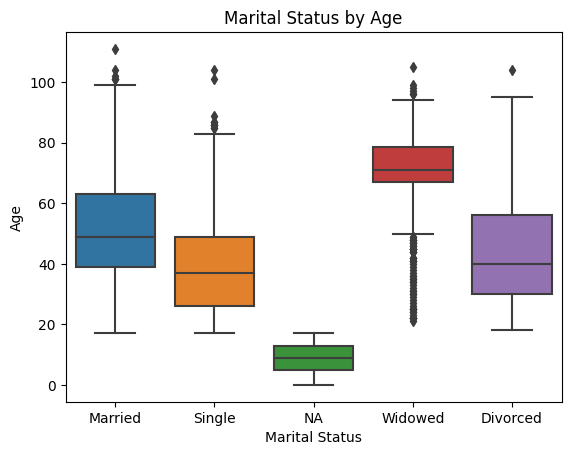

In [84]:
sns.boxplot(x=df["Marital Status"], y=df["Age"])
plt.title('Marital Status by Age')

In [85]:
# Age statistics of each Marital Status type
for col in df['Marital Status'].unique():
    Stats = df[df['Marital Status'] == col]
    print(f"{col}: {Stats['Age'].describe()}")
    print('\n')
    print(f"{col}: {Stats['Age'].mode()}")
    print('\n')

Married: count    2346.000000
mean       51.064365
std        16.585673
min        17.000000
25%        39.000000
50%        49.000000
75%        63.000000
max       111.000000
Name: Age, dtype: float64


Married: 0    45
Name: Age, dtype: int64


Single: count    3079.000000
mean       38.109451
std        14.336893
min        17.000000
25%        26.000000
50%        37.000000
75%        49.000000
max       104.000000
Name: Age, dtype: float64


Single: 0    18
Name: Age, dtype: int64


NA: count    1879.000000
mean        8.998936
std         4.975874
min         0.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        17.000000
Name: Age, dtype: float64


NA: 0    10
Name: Age, dtype: int64


Widowed: count    471.000000
mean      69.210191
std       15.026515
min       21.000000
25%       67.000000
50%       71.000000
75%       78.500000
max      105.000000
Name: Age, dtype: float64


Widowed: 0    69
Name: Age, dtype: int64


Divorced: count    880.00000

Text(0.5, 1.0, 'Unemployment_by_Age')

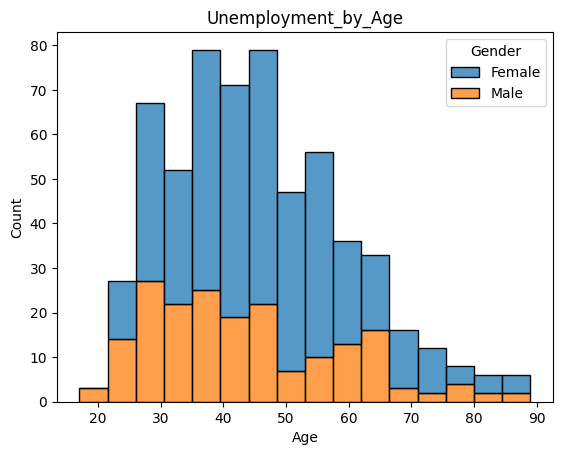

In [86]:
sns.histplot(data=df.loc[df['Occupation'] == 'Unemployed'], x='Age', hue='Gender',multiple = 'stack')
plt.title('Unemployment_by_Age')

Text(0.5, 1.0, 'Age Distribution')

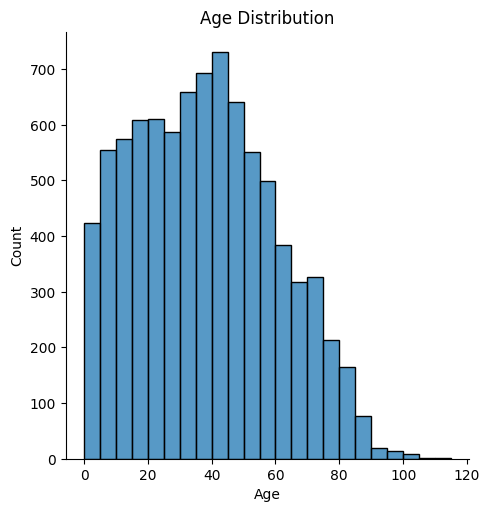

In [87]:
#Plotting the histogram of the age of the population
sns.displot(df, x = 'Age', binwidth = 5)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Female Age Distribution')

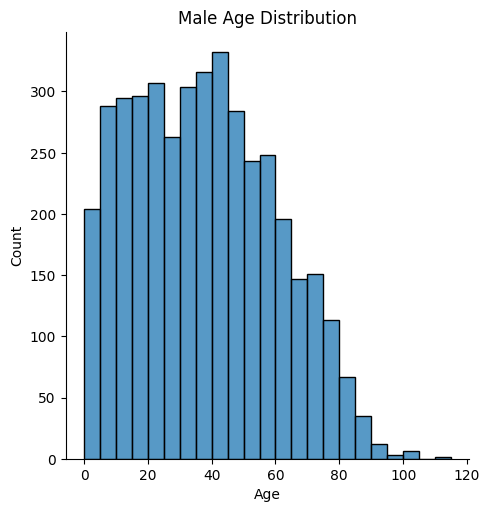

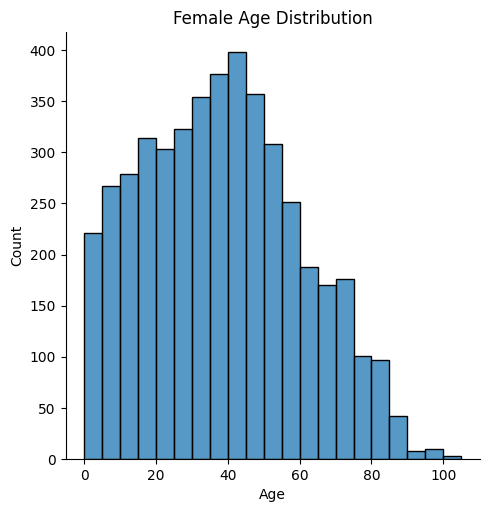

In [88]:
#plotting the hsitogram for both male and female Age
ax=sns.displot(Male_df, x = 'Age', binwidth = 5)
plt.title('Male Age Distribution')
ax=sns.displot(Female_df, x = 'Age', binwidth = 5)
plt.title('Female Age Distribution')

Text(0.5, 1.0, 'Religion')

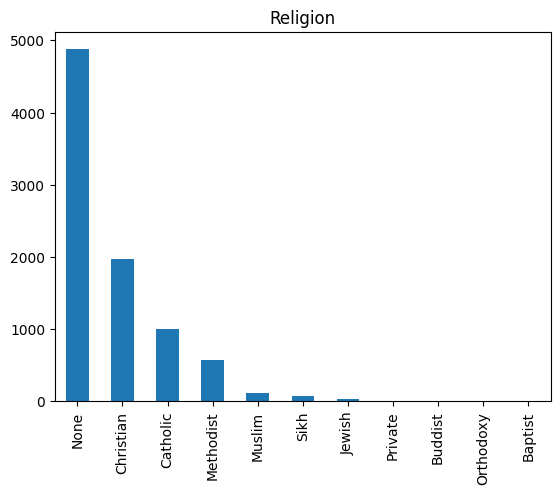

In [89]:
#Plotting the histogram showing different religions
df['Religion'].value_counts().plot(kind = 'bar')
plt.title('Religion')

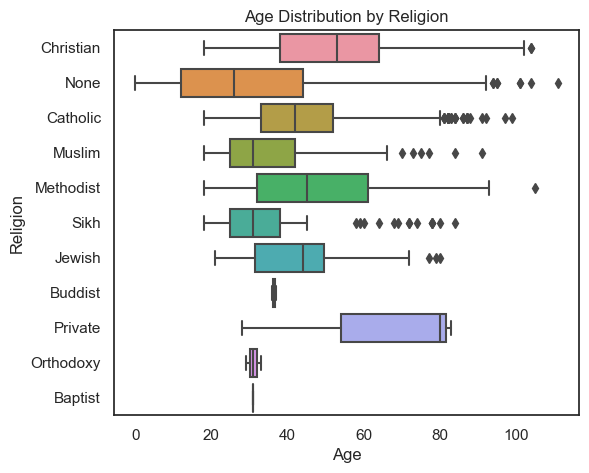

In [90]:
#Plotting the age distribution by religion
sns.set(rc={'figure.figsize':(6,5)}, font_scale=1.0, style='white')
sns.boxplot(data=df, x ='Age', y='Religion',)
plt.title('Age Distribution by Religion')
plt.show()

# Age Population Pyramid

In [91]:
Male=df[(df['Gender']=='Male')]
Female=df[(df['Gender']=='Female')]

In [92]:
Male_age_count= Male['age_range'].value_counts()
Male_age_count= list(-Male_age_count)
Male_age_count.reverse()
Female_age_count= Male['age_range'].value_counts()
Female_age_count= list(Female_age_count)
Female_age_count.reverse()
Age_band = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100-104','105+']
Age_band.reverse()

In [93]:
print(Age_band)

['105+', '100-104', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']


In [94]:
print(Male_age_count)
print(Female_age_count)

[-1, -3, -6, -12, -35, -67, -113, -147, -151, -196, -203, -243, -248, -263, -284, -288, -295, -295, -304, -307, -316, -332]
[1, 3, 6, 12, 35, 67, 113, 147, 151, 196, 203, 243, 248, 263, 284, 288, 295, 295, 304, 307, 316, 332]


In [95]:
new_table=pd.DataFrame({'Age_band': Age_band,'Male':Male_age_count, 'Female': Female_age_count})

Text(0.5, 1.0, 'Age Pyramid')

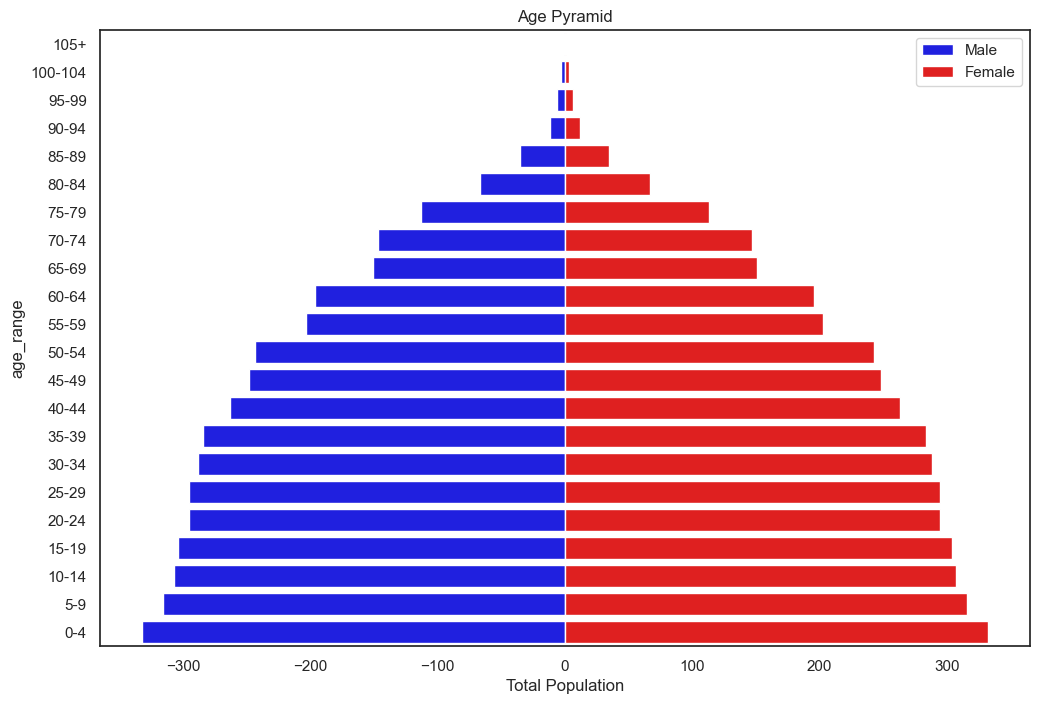

In [96]:
plt.figure(figsize=(12,8))
Age_pyramid=sns.barplot(x='Male',y='Age_band', data=new_table, color=('blue'), label='Male')
Age_pyramid=sns.barplot(x='Female',y='Age_band', data=new_table, color=('Red'), label='Female')
Age_pyramid.legend()
Age_pyramid.set(xlabel='Total Population', ylabel='age_range')
plt.title('Age Pyramid')

Text(0.5, 1.0, 'Relationship to Head of House')

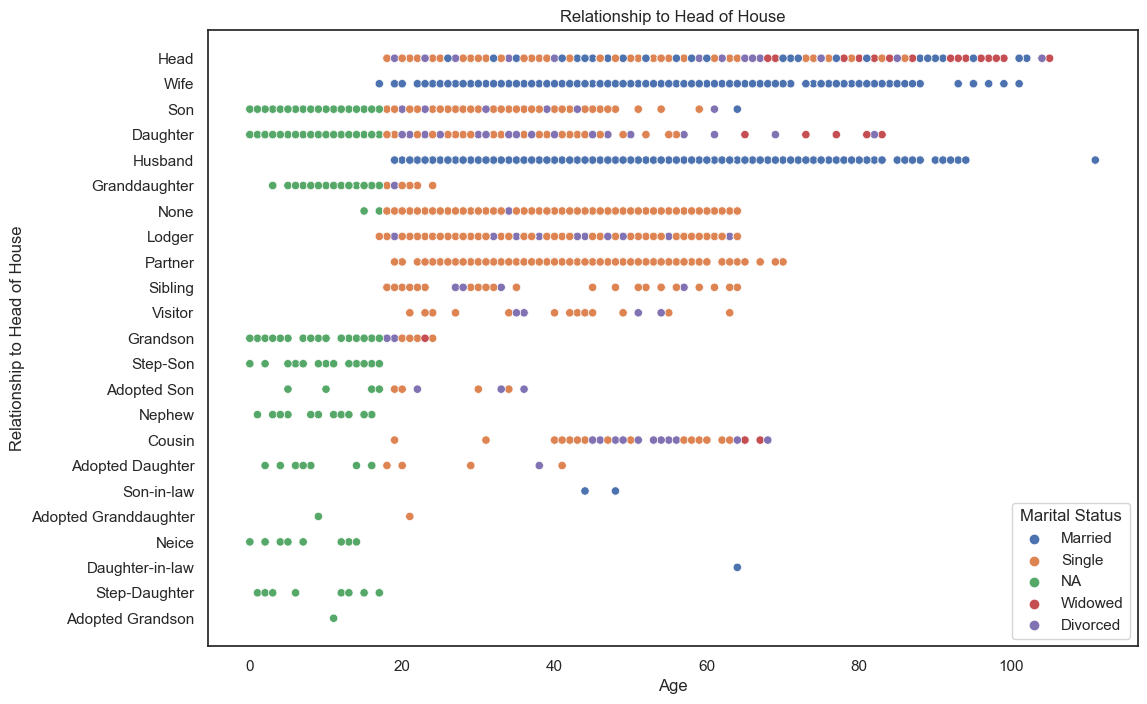

In [97]:
#Plotting relationship to head of house
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Age', y='Relationship to Head of House', hue='Marital Status')
plt.title('Relationship to Head of House')

# BIRTH RATE

In [98]:
#Calculating for birth rate
babies_age_zero = len(df[df['Age'] == 0])
total_pop = len(df)
birth_rate = (babies_age_zero /total_pop)*1000 
print(birth_rate)

8.54997111496245


# Evolving Birth Rate

In [99]:
#women of childbearing age between 25 - 29 years
birth_age_2529 = len(df[df['Age'] == 0])
childbearing_age_2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
childbearing_age_2529 = len(df[childbearing_age_2529])

print((birth_age_2529/childbearing_age_2529)*1000)

229.10216718266255


In [100]:
# women of childbearing age between 30 - 34 years
birth_age_3034 = len(df[df['Age'] == 4])
childbearing_age_3034 = (df['Age'].between(30,34)) & (df['Gender'] == 'Female')
childbearing_age_3034= len(df[childbearing_age_3034])

print((birth_age_3034/childbearing_age_3034)*1000)

225.98870056497174


# DEATH RATE

In [101]:
aging_group = df[df['Age'].between(65,120)].groupby('Age').size().sort_index(ascending=False)
aging_group

Age
111     1
105     1
104     3
102     1
101     4
99      2
98      1
97      2
96      2
95      6
94      2
93      3
92      6
91      4
90      5
89     10
88      9
87     19
86     17
85     22
84     31
83     29
82     29
81     42
80     33
79     42
78     41
77     39
76     43
75     49
74     47
73     61
72     75
71     72
70     72
69     79
68     48
67     73
66     61
65     56
dtype: int64

In [102]:
# shifting the ages up one to imitate the previous year's 'counts' per age

deduced_ages = aging_group.shift(-1)
deduced_ages

Age
111     1.0
105     3.0
104     1.0
102     4.0
101     2.0
99      1.0
98      2.0
97      2.0
96      6.0
95      2.0
94      3.0
93      6.0
92      4.0
91      5.0
90     10.0
89      9.0
88     19.0
87     17.0
86     22.0
85     31.0
84     29.0
83     29.0
82     42.0
81     33.0
80     42.0
79     41.0
78     39.0
77     43.0
76     49.0
75     47.0
74     61.0
73     75.0
72     72.0
71     72.0
70     79.0
69     48.0
68     73.0
67     61.0
66     56.0
65      NaN
dtype: float64

In [103]:
# calculate the difference between both two sets

diff = aging_group - deduced_ages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want to minus counts only

deaths = diff[diff['Count'] < 0]
deaths

,Age,Count
1,105,-2.0
3,102,-3.0
6,98,-1.0
8,96,-4.0
10,94,-1.0
11,93,-3.0
13,91,-1.0
14,90,-5.0
16,88,-10.0
18,86,-5.0


In [104]:
#Claculating the death rate
death_rate = abs(((deaths['Count']).sum())/total_pop)*1000
death_rate

15.713460427498555

In [105]:
Age_counts = df['age_range'].value_counts().sort_index(ascending=False)
Age_counts

95-99       13
90-94       20
85-89       77
80-84      164
75-79      214
70-74      327
65-69      317
60-64      384
55-59      499
50-54      551
5-9        555
45-49      641
40-44      730
35-39      693
30-34      658
25-29      586
20-24      610
15-19      608
110+         1
105-109      1
100-104      8
10-14      574
0-4        424
Name: age_range, dtype: int64

In [106]:
Age_counts_2 = Age_counts.shift(-1)
Age_counts_2

95-99       20.0
90-94       77.0
85-89      164.0
80-84      214.0
75-79      327.0
70-74      317.0
65-69      384.0
60-64      499.0
55-59      551.0
50-54      555.0
5-9        641.0
45-49      730.0
40-44      693.0
35-39      658.0
30-34      586.0
25-29      610.0
20-24      608.0
15-19        1.0
110+         1.0
105-109      8.0
100-104    574.0
10-14      424.0
0-4          NaN
Name: age_range, dtype: float64

In [107]:
diff_1 = Age_counts - Age_counts_2
diff_1

95-99       -7.0
90-94      -57.0
85-89      -87.0
80-84      -50.0
75-79     -113.0
70-74       10.0
65-69      -67.0
60-64     -115.0
55-59      -52.0
50-54       -4.0
5-9        -86.0
45-49      -89.0
40-44       37.0
35-39       35.0
30-34       72.0
25-29      -24.0
20-24        2.0
15-19      607.0
110+         0.0
105-109     -7.0
100-104   -566.0
10-14      150.0
0-4          NaN
Name: age_range, dtype: float64

# GROWTH RATE

In [108]:
#Calculating Growth Rate
print(f"GR {birth_rate - death_rate}")
print(f"GR as Percentage {(birth_rate-death_rate)/10}%")

GR -7.163489312536106
GR as Percentage -0.7163489312536105%


# IMMIGRATION

In [109]:
#immigrants = number of lodgers + visitors
lodgers = len(df[(df['Relationship to Head of House'] == 'Lodger') & (df['Marital Status']=='Single')])
visitors = len(df[df['Relationship to Head of House'] == 'Visitor'])
immigrants = lodgers + visitors
immigrants
immigrants_by_1000 = immigrants/1000 * 100
immigrants_by_1000

22.400000000000002

# EMMIGRATION

In [111]:
#emigrants (migration out) = divorced male
# To get emigrants, group by Marital Status and Gender
print("Groups in Marital Status by Gender:")
Emig_groups = df.groupby(["Marital Status","Gender"])
for group_key, group_value in Emig_groups:
    Emig_group = Emig_groups.get_group(group_key)
    #print("Count of each group:")
    Emig_grouped = df.groupby(["Marital Status", "Gender"]
                                     ).size().reset_index(name="Count")
print(Emig_grouped)

Groups in Marital Status by Gender:
  Marital Status  Gender  Count
0       Divorced  Female    516
1       Divorced    Male    364
2        Married  Female   1173
3        Married    Male   1173
4             NA  Female    922
5             NA    Male    957
6         Single  Female   1641
7         Single    Male   1438
8        Widowed  Female    294
9        Widowed    Male    177


In [112]:
#emmigrants is difference between female divorced and male divorced
emmigrants = 516 - 364
emmigrants
emmigrants_by_1000 = (emmigrants/total_pop)*1000
print(f"emmigrant per 1000: {emmigrants_by_1000}")

emmigrant per 1000: 17.56210283073368


In [113]:
#Calculating population change
Population_Change = (immigrants_by_1000 + birth_rate ) - (emmigrants_by_1000 + death_rate)
Population_Change

-2.3255921432697804

# OCCUPANCY RATE

In [114]:
# household occupancy rates
household_occ = df.groupby(['House Number', 'Street']).size().reset_index(name='Household Occupancy Number')
household_occ

,House Number,Street,Household Occupancy Number
0,1,Albionpush Drive,5
1,1,Appletree Camp,2
2,1,Archtap Drive,2
3,1,Barber Point,1
4,1,Berry Hollow,4
...,...,...,...
3411,210,Fish Drive,2
3412,211,Fish Drive,5
3413,212,Fish Drive,4
3414,213,Fish Drive,5


In [115]:
#Checking the count of the household occupancy
household_occ.groupby('Household Occupancy Number').count()

,House Number,Street
Household Occupancy Number,,
1,1171,1171
2,881,881
3,515,515
4,467,467
5,254,254
6,73,73
7,15,15
8,4,4
9,3,3


In [116]:
#Checking for the mean, median, var and std
household_occ.agg([npy.mean,npy.median,npy.var,npy.std])

C:\Users\x\AppData\Local\Temp\ipykernel_9264\742916033.py:2: FutureWarning: ['Street'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  household_occ.agg([npy.mean,npy.median,npy.var,npy.std])


,House Number,Household Occupancy Number
mean,42.521077,2.533665
median,25.000000,2.000000
var,2307.198384,3.313068
std,48.033305,1.820184


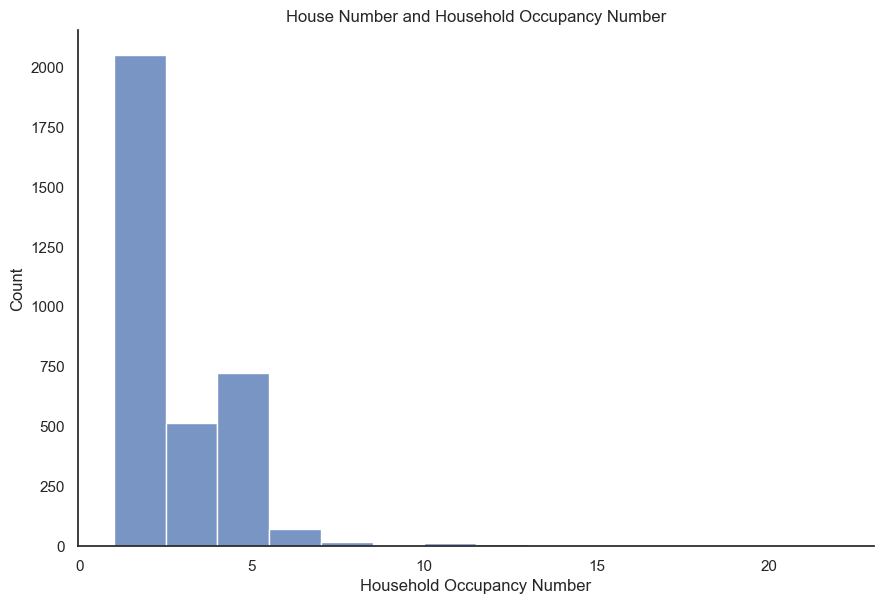

In [117]:
sns.displot(x='Household Occupancy Number', binwidth=1.5, data=household_occ, height=6, aspect=1.5)
plt.title('House Number and Household Occupancy Number')
plt.show()

In [118]:
household_occ['Household Occupancy Number'].value_counts()/len(household_occ)*100
# 34% of the household are occupied by 1 person, about 26% by 2 people, 15% by 3 people and 13.7% by 4 people. This shows that some houses are densely populated and others are not.

1     34.279859
2     25.790398
3     15.076112
4     13.670960
5      7.435597
6      2.137002
7      0.439110
12     0.292740
10     0.204918
11     0.146370
8      0.117096
9      0.087822
13     0.058548
22     0.058548
20     0.058548
14     0.058548
16     0.029274
17     0.029274
21     0.029274
Name: Household Occupancy Number, dtype: float64

In [119]:
number_of_lodger = len(df[(df['Relationship to Head of House'] == 'Lodger')])
number_of_lodger

272

In [120]:
number_of_visitor = len(df[(df['Relationship to Head of House'] == 'Visitor')])
number_of_visitor

21

In [121]:
high_density_building = number_of_lodger + number_of_visitor
high_density_building

293

# ASSUMED COMMUTERS

In [122]:
#Selecting employed commuters at random
commuters = df[df['Age'].between(18,65)]
commuters['Occupation'].unique()

array(['Engineer, energy', 'Psychiatrist', 'Unemployed',
       'Engineer, biomedical', 'Surveyor, building control',
       'Corporate treasurer', 'Student', 'Print production planner',
       'Multimedia specialist', 'Tax adviser', 'University Student',
       'Music therapist', 'Airline pilot', 'Retail banker',
       'General practice doctor', 'Hospital doctor',
       'Communications engineer', 'Sport and exercise psychologist',
       'Equities trader', 'Hydrographic surveyor',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Health physicist', 'Museum/gallery exhibitions officer',
       'Race relations officer', 'Secretary/administrator',
       'Pension scheme manager', 'Call centre manager',
       'Lecturer, higher education', 'Town planner', 'Prison officer',
       'Paramedic', 'Broadcast engineer',
       'Control and instrumentation engineer', 'Sports administrator',
       'Dramatherapist', 'Copywriter, advertising',
       'Administrator, c

In [123]:
#Randomly selected number of assumed commuters

assumed_commuters = len(df[df['Occupation'].isin(['Engineer, energy', 'Psychiatrist', 'Unemployed',
       'Engineer, biomedical', 'Surveyor, building control',
       'Corporate treasurer', 'Student', 'Print production planner',
       'Multimedia specialist', 'Tax adviser', 'University Student',
       'Music therapist', 'Airline pilot', 'Retail banker',
       'General practice doctor', 'Hospital doctor',
       'Communications engineer', 'Sport and exercise psychologist',
       'Equities trader', 'Hydrographic surveyor',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Health physicist', 'Museum/gallery exhibitions officer',
       'Race relations officer', 'Secretary/administrator',
       'Pension scheme manager', 'Call centre manager',
       'Lecturer, higher education', 'Town planner', 'Prison officer',
       'Paramedic', 'Broadcast engineer',
       'Control and instrumentation engineer', 'Sports administrator',
       'Dramatherapist', 'Copywriter, advertising',
       'Administrator, charities/voluntary organisations',
       'Scientist, forensic', 'Chief Operating Officer',
       'Therapist, horticultural', 'Nature conservation officer',
       'Engineer, materials', 'Mechanical engineer', 'Dealer',
       'Environmental manager', 'Exercise physiologist',
       'Production designer, theatre/television/film',
       'Investment analyst', 'Animator', 'Risk manager',
       'Scientist, biomedical', 'Journalist, newspaper', 'Pathologist',
       'Patent attorney', 'Early years teacher', 'Engineer, maintenance',
       'Lighting technician, broadcasting/film/video', 'Gaffer',
       'Geologist, wellsite', 'Financial risk analyst',
       'Surveyor, minerals', 'Scientist, research (medical)',
       'Statistician', 'Naval architect', 'Psychologist, occupational',
       'Food technologist', 'Geneticist, molecular',
       'Child psychotherapist', 'Industrial buyer', 'Actuary',
       'Primary school teacher', 'Claims inspector/assessor',
       'Chiropodist', 'Educational psychologist',
       'Engineer, manufacturing', 'Designer, industrial/product',
       'Investment banker, operational',
       'Accountant, chartered certified', 'Dietitian', 'Music tutor',
       'Mudlogger', 'Lexicographer', 'Environmental consultant',
       'Advice worker', 'Education officer, environmental',
       'Doctor, general practice', 'Jewellery designer',
       'Exhibitions officer, museum/gallery', 'Manufacturing engineer',
       'Fitness centre manager', 'Amenity horticulturist',
       'Advertising copywriter', 'Translator',
       'Training and development officer', 'Administrator',
       'Psychologist, counselling', 'Chartered certified accountant',
       'Art gallery manager', 'Ceramics designer',
       'Scientist, water quality', 'Geophysicist/field seismologist',
       'Media planner', 'Engineer, production', 'Travel agency manager',
       'Therapist, art', 'Chemist, analytical', 'Publishing copy',
       'Set designer', 'Plant breeder/geneticist',
       'Therapist, occupational', 'Agricultural consultant',
       'Insurance underwriter', 'Drilling engineer', 'Tourism officer',
       'Field seismologist', 'Engineer, drilling'])])

print(F"Number of assumed commuters is {assumed_commuters}")

Number of assumed commuters is 3606


In [124]:
#Percentage of assumed commuters
total_population = len(df)
percenatage_assumed_commuters = assumed_commuters/total_population * 100
percenatage_assumed_commuters

41.66377816291161

# UNEMPLOYMENT

In [125]:
#Calculating the number of unemployed in the population
unemployed_df = len(df[df['New_Occupation'] == 'Unemployed'])
unemployed_df

598

In [126]:
#Calculating the number of employed in the population
employed_df = len(df[df['New_Occupation'] =='Employed'])
employed_df

4608

In [127]:
#Calculating the working population and unemployed ratio
working_population = unemployed_df + employed_df
unemployed_ratio = (unemployed_df/working_population) * 100
unemployed_ratio

11.486746062235882

In [128]:
#Calculating the unemployed age classs counts
unemployed_age_count = df[df['New_Occupation'] == 'Unemployed']
unemployed_age_count['age_range'].value_counts()

40-44    89
35-39    79
45-49    76
30-34    74
25-29    57
50-54    53
55-59    51
60-64    41
65-69    24
20-24    17
70-74    16
75-79     8
85-89     6
80-84     6
15-19     1
Name: age_range, dtype: int64

In [129]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
age_range                        0
Employed                         0
New_Occupation                   0
dtype: int64

In [130]:
df.count()

House Number                     8655
Street                           8655
First Name                       8655
Surname                          8655
Age                              8655
Relationship to Head of House    8655
Marital Status                   8655
Gender                           8655
Occupation                       8655
Infirmity                        8655
Religion                         8655
age_range                        8655
Employed                         8655
New_Occupation                   8655
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8655 entries, 0 to 8659
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8655 non-null   int64 
 1   Street                         8655 non-null   object
 2   First Name                     8655 non-null   object
 3   Surname                        8655 non-null   object
 4   Age                            8655 non-null   int64 
 5   Relationship to Head of House  8655 non-null   object
 6   Marital Status                 8655 non-null   object
 7   Gender                         8655 non-null   object
 8   Occupation                     8655 non-null   object
 9   Infirmity                      8655 non-null   object
 10  Religion                       8655 non-null   object
 11  age_range                      8655 non-null   object
 12  Employed                       8655 non-null   object
 13  New

In [132]:
plt.savefig('House Number and Household Occupancy Number')
plt.savefig('Relationship to Head of House')
plt.savefig('Age Pyramid')
plt.savefig('Age Distribution by Religion')
plt.savefig('Religion')
plt.savefig('Male Age Distribution')
plt.savefig('Female Age Distribution')
plt.savefig('Age Distribution')
plt.savefig('Unemployment_by_Age')
plt.savefig('Marital Status by Age')

<Figure size 600x500 with 0 Axes>